<a href="https://colab.research.google.com/github/Gaukhar-ai/for_my_Thinkful_work/blob/master/Copy_of_Time_Series_Day_1_Afternoon_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time Series Afternoon Assignment

In [1]:
import pandas as pd
%matplotlib inline

### Load the [web_events.csv](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/web_events.csv) data set into a Pandas dataframe.

In [2]:
sales_df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/web_events.csv')

In [3]:
sales_df.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


### Convert the values in the timestamp field to datetimes.

In [4]:
sales_df['timestamp'] = pd.to_datetime(sales_df['timestamp'], unit='ms')

In [5]:
sales_df.head()

,timestamp,visitorid,event,itemid,transactionid
0,2015-06-02 05:02:12.117,257597,view,355908,NaN
1,2015-06-02 05:50:14.164,992329,view,248676,NaN
2,2015-06-02 05:13:19.827,111016,view,318965,NaN
3,2015-06-02 05:12:35.914,483717,view,253185,NaN
4,2015-06-02 05:02:17.106,951259,view,367447,NaN


In [6]:
sales_df.dtypes

timestamp        datetime64[ns]
visitorid                 int64
event                    object
itemid                    int64
transactionid           float64
dtype: object

### Extract different time units from the timestamp field.

In [7]:
sales_df['date'] = sales_df['timestamp'].dt.date
sales_df['year'] = sales_df['timestamp'].dt.year
sales_df['quarter'] = sales_df['timestamp'].dt.quarter
sales_df['month'] = sales_df['timestamp'].dt.month
sales_df['weekday'] = sales_df['timestamp'].dt.weekday
sales_df['day'] = sales_df['timestamp'].dt.day
sales_df['hour'] = sales_df['timestamp'].dt.hour

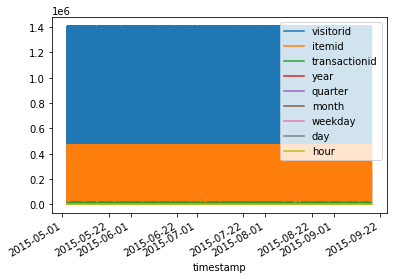

In [8]:
sales_df.set_index('timestamp').plot()

### Aggregate on each one, counting the number of records, and see what insights you can discover for each type of event.


In [9]:
sales_df['event'].unique()

array(['view', 'addtocart', 'transaction'], dtype=object)

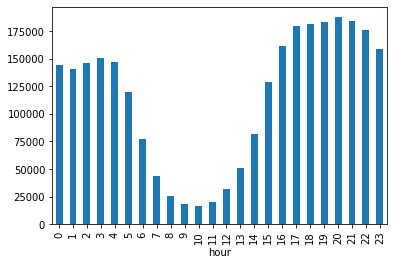

In [10]:
sales_df.groupby('hour').count()['event'].plot(kind='bar')

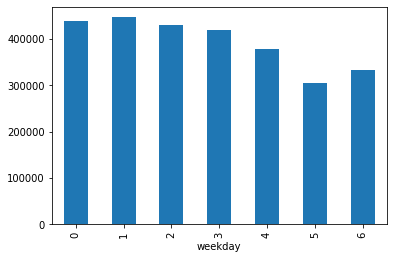

In [11]:
sales_df.groupby('weekday').count()['event'].plot(kind='bar')

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
agg_df = sales_df.groupby(['hour','weekday']).count()['event'].reset_index()
agg_df.head()


,hour,weekday,event
0,0,0,21768
1,0,1,23304
2,0,2,22057
3,0,3,21908
4,0,4,21078


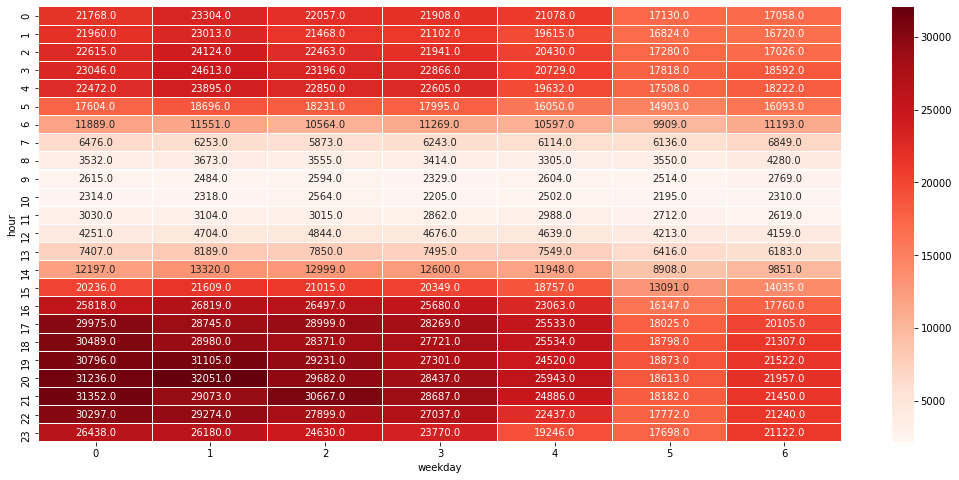

In [15]:
hour_weekday = agg_df.pivot_table(index='hour', columns='weekday', values='event', aggfunc='sum')
plt.figure(figsize=(18,8))
sns.heatmap(hour_weekday, annot=True, fmt='.1f', cmap='Reds', linewidths=.01)

### Round datetimes by hour, aggregate, and see what insights you can discover.

In [17]:
sales_df['round_hour'] = sales_df['timestamp'].dt.round('H').dt.hour
sales_df.head()

,timestamp,visitorid,event,itemid,transactionid,date,year,quarter,month,weekday,day,hour,round_hour
0,2015-06-02 05:02:12.117,257597,view,355908,NaN,2015-06-02,2015,2,6,1,2,5,5
1,2015-06-02 05:50:14.164,992329,view,248676,NaN,2015-06-02,2015,2,6,1,2,5,6
2,2015-06-02 05:13:19.827,111016,view,318965,NaN,2015-06-02,2015,2,6,1,2,5,5
3,2015-06-02 05:12:35.914,483717,view,253185,NaN,2015-06-02,2015,2,6,1,2,5,5
4,2015-06-02 05:02:17.106,951259,view,367447,NaN,2015-06-02,2015,2,6,1,2,5,5


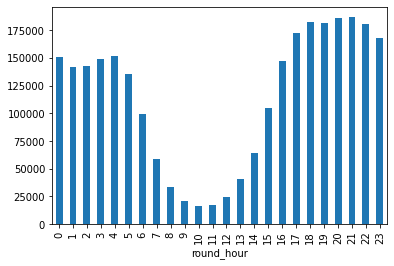

In [18]:
sales_df.groupby('round_hour').count()['event'].plot(kind='bar')

<br>

### Load the [life_expectancy.csv](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/life_expectancy.csv) data set into a Pandas dataframe.


In [19]:
life_df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/life_expectancy.csv')

In [20]:
life_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,67.762,68.095,68.436,68.784,69.140,69.498,69.851,70.191,70.519,70.833,71.140,71.441,71.736,72.023,72.293,72.538,72.751,72.929,73.071,73.181,73.262,73.325,73.378,73.425,73.468,73.509,73.544,73.573,73.598,73.622,73.646,73.671,73.700,73.738,73.787,73.853,73.937,74.038,74.156,74.287,74.429,74.576,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.292,32.742,33.185,33.624,34.060,34.495,34.928,35.361,35.796,36.234,36.678,37.128,37.587,38.056,38.540,39.039,39.556,40.092,40.650,41.234,41.853,42.513,43.217,43.963,44.747,45.566,46.417,47.288,48.164,49.028,49.856,50.627,51.331,51.968,52.539,53.055,53.533,53.997,54.468,54.959,55.482,56.044,56.637,57.250,57.875,58.500,59.110,59.694,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.251,33.573,33.914,34.272,34.645,35.031,35.426,35.828,36.234,36.640,37.047,37.460,37.878,38.297,38.712,39.110,39.478,39.810,40.099,40.344,40.546,40.710,40.848,40.970,41.085,41.193,41.292,41.382,41.471,41.572,41.696,41.855,42.060,42.329,42.677,43.125,43.695,44.385,45.192,46.105,47.113,48.200,49.341,50.508,51.676,52.833,53.974,55.096,56.189,57.231,58.192,59.042,59.770,60.373,60.858,61.241,61.547
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.279,63.298,64.187,64.911,65.461,65.848,66.108,66.302,66.485,66.687,66.933,67.235,67.580,67.951,68.341,68.734,69.108,69.447,69.741,69.990,70.207,70.416,70.635,70.876,71.134,71.388,71.605,71.760,71.843,71.860,71.836,71.803,71.802,71.860,71.992,72.205,72.495,72.838,73.208,73.588,73.955,74.286,74.575,74.820,75.028,75.217,75.418,75.656,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Transform/melt the data so that the years are listed in a single column instead of separate columns.

In [22]:
ids = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
melt_fields = set(life_df.columns) - set(ids)
melted_df = pd.melt(life_df, 
                    id_vars=ids, 
                    value_vars=melt_fields, 
                    var_name="Year",
                    value_name="life_expectancy")
melted_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,life_expectancy
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2005,74.287
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2005,58.500
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2005,52.833
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2005,75.217
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2005,NaN


### Practice address missing values for countries using the different approaches (imputation, interpolation, and deletion).


In [23]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15048 entries, 0 to 15047
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     15048 non-null  object 
 1   Country Code     15048 non-null  object 
 2   Indicator Name   15048 non-null  object 
 3   Indicator Code   15048 non-null  object 
 4   Year             15048 non-null  object 
 5   life_expectancy  13747 non-null  float64
dtypes: float64(1), object(5)
memory usage: 705.5+ KB


In [24]:
# imputation
imputed_df = melted_df.copy()
# imputed_df['life_expectancy'] = imputed_df['life_expectancy'].fillna(imputed_df['life_expectancy'].mean())
imputed_df['life_expectancy'] = imputed_df.groupby('Country Name')['life_expectancy'].transform(lambda x: x.fillna(x.mean()))
imputed_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,life_expectancy
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2005,74.287
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2005,58.500
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2005,52.833
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2005,75.217
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2005,NaN


In [25]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15048 entries, 0 to 15047
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     15048 non-null  object 
 1   Country Code     15048 non-null  object 
 2   Indicator Name   15048 non-null  object 
 3   Indicator Code   15048 non-null  object 
 4   Year             15048 non-null  object 
 5   life_expectancy  14478 non-null  float64
dtypes: float64(1), object(5)
memory usage: 705.5+ KB


In [26]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15048 entries, 0 to 15047
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     15048 non-null  object 
 1   Country Code     15048 non-null  object 
 2   Indicator Name   15048 non-null  object 
 3   Indicator Code   15048 non-null  object 
 4   Year             15048 non-null  object 
 5   life_expectancy  13747 non-null  float64
dtypes: float64(1), object(5)
memory usage: 705.5+ KB


In [27]:
# interpolation
interpolated_df = melted_df.copy()
interpolated_df['life_expectancy'] = interpolated_df.groupby('Country Name')['life_expectancy'].transform(lambda x: x.fillna(method='bfill'))

# interpolated_df['life_expectancy'] = interpolated_df['life_expectancy'].fillna(method='ffill')

In [28]:
interpolated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15048 entries, 0 to 15047
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     15048 non-null  object 
 1   Country Code     15048 non-null  object 
 2   Indicator Name   15048 non-null  object 
 3   Indicator Code   15048 non-null  object 
 4   Year             15048 non-null  object 
 5   life_expectancy  14367 non-null  float64
dtypes: float64(1), object(5)
memory usage: 705.5+ KB


In [29]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15048 entries, 0 to 15047
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     15048 non-null  object 
 1   Country Code     15048 non-null  object 
 2   Indicator Name   15048 non-null  object 
 3   Indicator Code   15048 non-null  object 
 4   Year             15048 non-null  object 
 5   life_expectancy  13747 non-null  float64
dtypes: float64(1), object(5)
memory usage: 705.5+ KB


In [30]:
delete_df = melted_df.copy()
delete_df = delete_df.dropna()
delete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13747 entries, 0 to 15047
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     13747 non-null  object 
 1   Country Code     13747 non-null  object 
 2   Indicator Name   13747 non-null  object 
 3   Indicator Code   13747 non-null  object 
 4   Year             13747 non-null  object 
 5   life_expectancy  13747 non-null  float64
dtypes: float64(1), object(5)
memory usage: 751.8+ KB
